<a href="https://colab.research.google.com/github/vkstar444/Face-Mask-Detection-CNN-Classification-/blob/main/face_mask_detection_cnn_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 86% 141M/163M [00:00<00:00, 282MB/s]
100% 163M/163M [00:00<00:00, 272MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [ ]:
with_mask_files[:5]

['with_mask_3555.jpg',
 'with_mask_2427.jpg',
 'with_mask_18.jpg',
 'with_mask_3171.jpg',
 'with_mask_3675.jpg']

In [ ]:
without_mask_files[:5]

['without_mask_2360.jpg',
 'without_mask_54.jpg',
 'without_mask_1921.jpg',
 'without_mask_2489.jpg',
 'without_mask_1503.jpg']

In [ ]:
print(f'Total number of images with mask: {len(with_mask_files)}')
print(f'Total number of images without mask: {len(without_mask_files)}')

Total number of images with mask: 3725
Total number of images without mask: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
with_mask_labels[:5]

[1, 1, 1, 1, 1]

In [ ]:
without_mask_labels[:5]

[0, 0, 0, 0, 0]

In [ ]:
labels = with_mask_labels + without_mask_labels

**Displaying the Images**

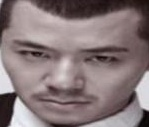

In [ ]:
img = cv2.imread('/content/data/without_mask/without_mask_100.jpg')
cv2_imshow(img)

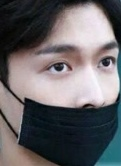

In [ ]:
img = cv2.imread('/content/data/with_mask/with_mask_1034.jpg')
cv2_imshow(img)

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[152, 128,  94],
        [152, 128,  94],
        [152, 128,  92],
        ...,
        [ 63,  63,  65],
        [ 62,  62,  64],
        [ 61,  63,  62]],

       [[152, 128,  94],
        [152, 128,  94],
        [152, 128,  92],
        ...,
        [ 65,  65,  67],
        [ 64,  64,  66],
        [ 62,  64,  63]],

       [[152, 127,  95],
        [152, 128,  94],
        [152, 128,  92],
        ...,
        [ 57,  57,  59],
        [ 56,  56,  58],
        [ 57,  58,  57]],

       ...,

       [[175, 180, 194],
        [158, 163, 177],
        [157, 162, 176],
        ...,
        [142, 152, 159],
        [139, 149, 156],
        [152, 161, 171]],

       [[162, 165, 180],
        [157, 160, 174],
        [162, 165, 179],
        ...,
        [146, 157, 163],
        [141, 153, 158],
        [141, 152, 160]],

       [[158, 160, 172],
        [166, 168, 181],
        [172, 174, 187],
        ...,
        [137, 150, 155],
        [140, 154, 160],
        [141, 156, 163]]], dtype=uint8)
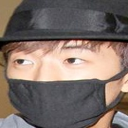

In [ ]:
data[2]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
x = np.array(data)
y = np.array(labels)

**Train Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6042, 128, 128, 3)
(1511, 128, 128, 3)
(6042,)
(1511,)


In [ ]:
# scaling the data
x_train_scal = x_train/225
s_test_scal = x_test/225

In [ ]:
x_train_scal[0]

array([[[1.01777778, 1.00888889, 1.02222222],
        [1.01777778, 1.00888889, 1.02222222],
        [1.01777778, 1.00888889, 1.02222222],
        ...,
        [1.02666667, 1.01777778, 1.03111111],
        [1.02666667, 1.01777778, 1.03111111],
        [1.03111111, 1.02222222, 1.03555556]],

       [[1.01777778, 1.00888889, 1.02222222],
        [1.01777778, 1.00888889, 1.02222222],
        [1.01777778, 1.00888889, 1.02222222],
        ...,
        [1.02666667, 1.01777778, 1.03111111],
        [1.02666667, 1.01777778, 1.03111111],
        [1.03111111, 1.02222222, 1.03555556]],

       [[1.01777778, 1.00888889, 1.02222222],
        [1.01777778, 1.00888889, 1.02222222],
        [1.01777778, 1.00888889, 1.02222222],
        ...,
        [1.02666667, 1.01777778, 1.03111111],
        [1.02666667, 1.01777778, 1.03111111],
        [1.03111111, 1.02222222, 1.03555556]],

       ...,

       [[0.14222222, 0.14222222, 0.14222222],
        [0.14222222, 0.14222222, 0.14222222],
        [0.13333333, 0

array([[[229, 227, 230],
        [229, 227, 230],
        [229, 227, 230],
        ...,
        [231, 229, 232],
        [231, 229, 232],
        [232, 230, 233]],

       [[229, 227, 230],
        [229, 227, 230],
        [229, 227, 230],
        ...,
        [231, 229, 232],
        [231, 229, 232],
        [232, 230, 233]],

       [[229, 227, 230],
        [229, 227, 230],
        [229, 227, 230],
        ...,
        [231, 229, 232],
        [231, 229, 232],
        [232, 230, 233]],

       ...,

       [[ 32,  32,  32],
        [ 32,  32,  32],
        [ 30,  30,  30],
        ...,
        [ 55,  53,  54],
        [ 55,  53,  54],
        [ 58,  54,  55]],

       [[ 33,  33,  33],
        [ 32,  32,  32],
        [ 31,  31,  31],
        ...,
        [ 55,  53,  54],
        [ 55,  53,  54],
        [ 56,  51,  53]],

       [[ 31,  31,  31],
        [ 31,  31,  31],
        [ 30,  30,  30],
        ...,
        [ 54,  52,  53],
        [ 53,  51,  52],
        [ 53,  49,  51]]], dtype=uint8)
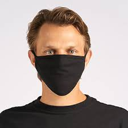

In [ ]:
x_train[0]

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

# kernel_size=(3, 3): Size of the convolution kernel.
# input_shape=(height, width, channels)
# MaxPooling2D - this layer is added after a convolutional layer to reduce the spatial dimensions of the feature maps
# -and control overfitting by reducing the number of parameters.
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
# It's a common practice to use dropout after fully connected (dense) layers
# or sometimes after convolutional layers to improve generalization.
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scal, y_train, epochs=10, validation_split = 0.1)

Epoch 1/10
170/170 [==============================] - 17s 95ms/step - loss: 0.5004 - accuracy: 0.7878 - val_loss: 0.2771 - val_accuracy: 0.8711
Epoch 2/10
170/170 [==============================] - 16s 92ms/step - loss: 0.2905 - accuracy: 0.8841 - val_loss: 0.2403 - val_accuracy: 0.8926
Epoch 3/10
170/170 [==============================] - 16s 94ms/step - loss: 0.2357 - accuracy: 0.9077 - val_loss: 0.2202 - val_accuracy: 0.9025
Epoch 4/10
170/170 [==============================] - 16s 93ms/step - loss: 0.1960 - accuracy: 0.9257 - val_loss: 0.2451 - val_accuracy: 0.9041
Epoch 5/10
170/170 [==============================] - 16s 92ms/step - loss: 0.1682 - accuracy: 0.9356 - val_loss: 0.2251 - val_accuracy: 0.9140
Epoch 6/10
170/170 [==============================] - 16s 93ms/step - loss: 0.1321 - accuracy: 0.9503 - val_loss: 0.3433 - val_accuracy: 0.9074
Epoch 7/10
170/170 [==============================] - 16s 92ms/step - loss: 0.1165 - accuracy: 0.9573 - val_loss: 0.2502 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(s_test_scal, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 25ms/step - loss: 0.2884 - accuracy: 0.9305
Test Accuracy = 0.9305095672607422


**Predictive System**

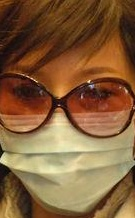

1/1 [==============================] - 0s 31ms/step
[[0.08141011 0.98919964]]
[1]
The person is not wearing mask


In [ ]:
input_image = '/content/data/with_mask/with_mask_10.jpg'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)
input_image = cv2.resize(input_image, (128,128))
input_image = input_image/255
input_image_reshape = np.reshape(input_image, (1,128,128,3))
pred = model.predict(input_image_reshape)
print(pred)
pred = np.argmax(pred, axis=1)
print(pred)
if pred < 0.5:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')

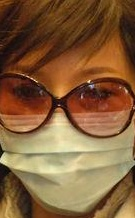

1/1 [==============================] - 0s 31ms/step
[[0.08141011 0.98919964]]
[1]
The person is not wearing mask


In [ ]:
input_image = '/content/data/with_mask/with_mask_10.jpg'

input_image = cv2.imread(input_image)
cv2_imshow(input_image)
input_image = cv2.resize(input_image, (128,128))
input_image = input_image/255
input_image_reshape = np.reshape(input_image, (1,128,128,3))
pred = model.predict(input_image_reshape)
print(pred)
pred = np.argmax(pred, axis=1)
print(pred)
if pred < 0.5:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')